# Ритейл — Анализ программы лояльности

Для магазина строительных материалов «Строили, строили и наконец построили» нужно проанализировать данные о покупках содержащихся в датасетах: 'retail_dataset.csv' и 'product_codes.csv'. Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

Результатами исследования являются дашборд (набор №1) и pdf-презентация.

## Материалы:
* [Презентация](https://docs.google.com/presentation/d/1eWk-wCU15ZrIa8HKaTPPwajJFhMLmKcZIxc61CUKHwM/edit?usp=sharing)
* [Дашборд](https://public.tableau.com/profile/max.tatarinov#!/vizhome/Book2_16119292267340/Sheet1?publish=yes)

### План исследования
_____

##### Предобработка данных:
* <a href="#step_1">1. Изучение файлов с данными, получение общей информации, загрузка библиотек.</a>
* <a href="#step_2">2. Переименование столбцов, обработка пропусков и выбросов.</a>
* <a href="#step_3">3. Дополнительные расчёты и сведение данных в одну таблицу.</a>

##### Исследовательский анализ данных:
* <a href="#step_41">4.1 Сколько людей покупают в день, неделю, месяц?</a>
* <a href="#step_42">4.2 В каких магазинах покупают больше?</a>
* <a href="#step_43">4.3 Сколько в среднем покупают и какая в среднем прибыль с клиента за период?</a>
* <a href="#step_44">4.4 Как часто покупатели возвращаются?</a>

##### Гипотезы:
* <a href="#step_5">5. Формулирование, проверка и пояснения гипотез.</a>


##### Итог:
* <a href="#step_6">6 Общий вывод.</a>

<a id='step_1'></a>
## 1. Изучение файлов с данными, получение общей информации, загрузка библиотек:

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

#Перманентно поменял настройки вывода графиков
from matplotlib import pylab
from pylab import *
pylab.rcParams['figure.figsize'] = (18.0, 6.0)
plt.rcParams.update({'font.size': 13})
sns.set(rc={'figure.figsize':(16,9)})

#Скрыл вывод предупреждений.
import warnings
warnings.filterwarnings('ignore') #чтобы вернуть: (action='once')

# Глобально снял ограничение на кол-во отображаемых результатов для каждой ячейки ввода кода.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Включил возможность форматировать стили текста с помощью метода printmd()
from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))
    
# Снял ограничение на вывод кол-ва столбцов и ширины колонки.
pd.set_option('display.max_columns', None)
try:
    pd.set_option('display.max_colwidth', None)
except:
    pd.set_option('display.max_colwidth', -1)

# Установил формат вывода в таблице на 2 знака после запятой.
pd.options.display.float_format = '{:,.2f}'.format
    
# Добавил функцию вывода таблиц в одну строку, для экономии пространства и улучшения восприятия информации.
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [2]:
product = pd.read_csv('/datasets/product_codes.csv')
retail = pd.read_csv('/datasets/retail_dataset.csv')

product.info()
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
productID        9969 non-null object
price_per_one    9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
ShopID             105335 non-null object
loyalty_program    105335 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [3]:
display_side_by_side([product.head(10),retail.head(10)],["product_codes","retail_dataset"])

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


In [4]:
# Вывел уникальные значения столбцов, для проверки корректности данных. 
# Применил try except для обхода ошибок сортировки. Сортировал значения там, где это возможно.
def check_unique(df):
    a = []
    for column in df.columns:
        datatype = df[column].dtypes
        print('{} ({}):'.format(column,datatype))
        try:
            a = df[column].unique()
            a.sort()
            with np.set_printoptions(formatter={'float_kind':'{:.2f}'.format}):
                print(a)
        except:
            print(a)
            
        print('Кол-во уникальных элементов: {}'.format(len(df[column].unique())))
        print('Кол-во элементов: {} из {}'.format(df[column].count(),len(df)))
        print()
        
printmd('**product_codes:**')
check_unique(product)
print()
print()
printmd('**retail_dataset:**')
check_unique(retail)

**product_codes:**

productID (object):
['10002' '10080' '10120' ... 'gift_0001_40' 'gift_0001_50' 'm']
Кол-во уникальных элементов: 3159
Кол-во элементов: 9969 из 9969

price_per_one (float64):
[0.00 0.03 0.06 0.07 0.10 0.12 0.14 0.16 0.17 0.18 0.19 0.20 0.21 0.22
 0.24 0.25 0.29 0.30 0.32 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42
 0.43 0.50 0.53 0.55 0.63 0.64 0.65 0.72 0.73 0.75 0.79 0.81 0.82 0.83
 0.84 0.85 0.87 0.94 0.95 0.97 0.99 1.00 1.04 1.05 1.06 1.23 1.24 1.25
 1.26 1.27 1.28 1.38 1.45 1.46 1.48 1.49 1.53 1.55 1.63 1.64 1.65 1.66
 1.67 1.69 1.70 1.75 1.80 1.84 1.85 1.87 1.88 1.91 1.93 1.95 2.00 2.07
 2.08 2.09 2.10 2.11 2.12 2.13 2.16 2.17 2.21 2.22 2.25 2.31 2.40 2.46
 2.48 2.50 2.51 2.54 2.55 2.65 2.69 2.75 2.76 2.80 2.82 2.90 2.92 2.94
 2.95 2.96 2.98 3.00 3.12 3.19 3.21 3.24 3.25 3.29 3.32 3.33 3.35 3.36
 3.37 3.38 3.39 3.44 3.45 3.49 3.50 3.73 3.75 3.81 3.82 3.83 3.86 3.88
 3.95 3.98 4.00 4.12 4.13 4.15 4.21 4.24 4.25 4.41 4.50 4.59 4.60 4.62
 4.65 4.68 4.71 4.77 4.78 4.79 4.81 4.95 4.9

**retail_dataset:**

purchaseid (object):
['536365' '536366' '536367' ... 'C545040' 'C545068' 'C545189']
Кол-во уникальных элементов: 4894
Кол-во элементов: 105335 из 105335

item_ID (object):
['10002' '10080' '10120' ... 'gift_0001_40' 'gift_0001_50' 'm']
Кол-во уникальных элементов: 3159
Кол-во элементов: 105335 из 105335

Quantity (int64):
[-74216  -9361  -2601  -1431  -1401   -991   -940   -742   -724   -601
   -501   -401   -391   -321   -311   -301   -291   -241   -235   -231
   -224   -218   -208   -207   -202   -201   -193   -178   -174   -163
   -151   -146   -145   -141   -131   -121   -115   -107   -101   -100
    -97    -95    -93    -89    -85    -81    -78    -77    -73    -71
    -70    -65    -62    -61    -60    -58    -55    -54    -53    -51
    -49    -48    -46    -45    -44    -43    -42    -41    -39    -37
    -36    -34    -33    -32    -31    -30    -29    -26    -25    -24
    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14
    -13    -12    -11    -10     -9  

### Вывод

Данные с признаками искажений:
* В колонке `CustomerID` таблицы **retail_dataset** cуществуют множество пропусков. Тип колонки должен быть int64.
* В колонке `Quantity` таблицы **retail_dataset** есть отрицательные и слишком большие значения.
* Требуется привести названия колонок к удобному виду для дальнейшей обработки.
* Тип колонки `purchasedate` таблицы **retail_dataset** должен быть datetime64. 

##### product (product_codes.csv):
<table>
  <thead>
    <tr>
        <td style="text-align: left;"><b>id колонки</b></td>
        <td style="text-align: left;width:100%;"><b>Описание</b></td>
        <td><b>Кол-во непустых значений</b></td>
        <td><b>Тип данных</b></td>
        <td style="text-align: left;min-width:315px;"><b>Комментарий</b></td>
    </tr>
  </thead>
    <tr>
        <td style="text-align: left;">productID</td>
        <td style="text-align: left;">id товара</td>
        <td>9969</td>
        <td>
            object
        </td>
        <td style="text-align: left;">Существуют дубликаты.</td>
    </tr>
    <tr>
        <td style="text-align: left;">price_per_one</td>
        <td style="text-align: left;">стоимость одной единицы товара</td>
        <td>9969</td>
        <td>
            float64
        </td>
        <td style="text-align: left;">Разные цены на один товар, а также есть нулевые значения.</td>
    </tr>
</table>
<br>
<br>  

##### retail (retail_dataset.csv):
<table>
  <thead>
    <tr>
        <td style="text-align: left;"><b>id колонки</b></td>
        <td style="text-align: left;width:100%;"><b>Описание</b></td>
        <td><b>Кол-во непустых значений</b></td>
        <td><b>Тип данных</b></td>
        <td style="text-align: left;min-width:315px;"><b>Комментарий</b></td>
    </tr>
  </thead>
    <tr>
        <td style="text-align: left;">purchaseid</td>
        <td style="text-align: left;">id чека</td>
        <td>105335</td>
        <td>
            object
        </td>
        <td style="text-align: left;">На первый взгляд данные в порядке</td>
    </tr>
    <tr>
        <td style="text-align: left;">item_ID</td>
        <td style="text-align: left;">id товара</td>
        <td>105335</td>
        <td>
            object
        </td>
        <td style="text-align: left;">На первый взгляд данные в порядке</td>
    </tr>
    <tr>
        <td style="text-align: left;">Quantity</td>
        <td style="text-align: left;">количество товара</td>
        <td>105335</td>
        <td>
            int64
        </td>
        <td style="text-align: left;">Есть отрицательные и слишком большие значения</td>
    </tr>
    <tr>
        <td style="text-align: left;">
            purchasedate
        </td>
        <td style="text-align: left;">дата покупки</td>
        <td>
            105335
        </td>
        <td>
            object
        </td>
        <td style="text-align: left;">Тип колонки должен быть datetime</td>
    </tr>
    <tr>
        <td style="text-align: left;">
            CustomerID
        </td>
        <td style="text-align: left;">id покупателя</td>
        <td>
            69125
        </td>
        <td>
            float64
        </td>
        <td style="text-align: left;">Есть пропуски NaN. Значения можно округлит типом данных int64.</td>
    </tr>
    <tr>
        <td style="text-align: left;">
            ShopID
        </td>
        <td style="text-align: left;">id магазина</td>
        <td>
            105335
        </td>
        <td>
            object
        </td>
        <td style="text-align: left;">Данные в норме</td>
    </tr>
    <tr>
        <td style="text-align: left;">
            loyalty_program
        </td>
        <td style="text-align: left;">участвует ли покупатель в программе лояльности</td>
        <td>
            105335
        </td>
        <td>
            float64
        </td>
        <td style="text-align: left;">Тип данных должен быть bool.</td>
    </tr>
</table>

<a id='step_2'></a>
## 2. Переименование столбцов, обработка пропусков и выбросов:

In [5]:
#Переименовал столбцы
product.columns = ['pid','price']
retail.columns = ['buy_id','pid','quantity','buy_date','uid','shopid','loyal']

display_side_by_side([product.head(),retail.head()],["product_codes","retail_dataset"])

In [6]:
# #Отсеял незарегистрированных пользователей в датафрейме retail

# printmd('**До:**')
# print('Всего строк: {}'.format(len(retail)))
# print('Количество NaN в `uid`: {}'.format(retail['uid'].isna().sum()))
# print()

# retail = retail.query('uid == uid')

# printmd('**После:**')
# print('Всего строк: {}'.format(len(retail)))
# print('Количество NaN в `uid`: {}'.format(retail['uid'].isna().sum()))

#fix_1
retail['uid'] = retail['uid'].fillna(0)

In [7]:
#Поменял типы колонок
retail['uid'] = retail['uid'].astype("int64")
retail['buy_date'] = retail['buy_date'].astype("datetime64")
retail['loyal'] = retail['loyal'].astype("bool")

dtype(retail['uid'])
dtype(retail['buy_date'])
dtype(retail['loyal'])

dtype('int64')

dtype('<M8[ns]')

dtype('bool')

In [8]:
#Отсеял строки с отрицательными значениями количества.
print('Кол-во покупок до обработки: {}'.format(len(retail)))
print('Количество покупок с отрицательным количеством товаров: {}'.format(len(retail.query('quantity < 0'))))
print('Процент от общего количества покупок: {:.2f}%'.format(len(retail.query('quantity < 0')) / len(retail)*100))

retail = retail.query('quantity >= 0')

print('Кол-во покупок после обработки: {}'.format(len(retail)))

Кол-во покупок до обработки: 105335
Количество покупок с отрицательным количеством товаров: 2118
Процент от общего количества покупок: 2.01%
Кол-во покупок после обработки: 103217


In [9]:
print('Количество покупок с нулевым количеством товаров: {}'.format(len(retail.query('quantity == 0'))))
print('Процент от общего количества покупок: {:.2f}%'.format(len(retail.query('quantity == 0')) / len(retail)*100))

Количество покупок с нулевым количеством товаров: 33055
Процент от общего количества покупок: 32.02%


Процент нулевых значений покупки слишком велик. Имеет смысл заполнить их по моде. Но сперва удалим выбросы тех покупок, где количество товаров положительное.

In [10]:
#Временно отсеял нулевые значения.
temp_retail = retail.query('quantity > 0')
len(temp_retail)

70162

In [11]:
#За 2 шага удалил выбросы, учитывая 3 квартиль и среднеквадратичное отклонение.
source = temp_retail['quantity'].describe().to_frame()
step_1 = temp_retail[temp_retail['quantity'] < 100]['quantity'].describe().to_frame()
step_2 = temp_retail[temp_retail['quantity'] <= 25]['quantity'].describe().to_frame()

display_side_by_side([source,step_1,step_2],["source","step_1","step_2"])

,quantity
count,70162
mean,13.4476
std,285.278
min,1
25%,2
50%,5
75%,11
max,74214
,quantity
count,69305


In [12]:
print('Удалено выбросов: {}'.format(source.T['count'][0] - step_2.T['count'][0]))
print('Процент удаленных выбросов: {:.2f}%'.format((1 - step_2.T['count'][0] / source.T['count'][0])*100))

Удалено выбросов: 4760.0
Процент удаленных выбросов: 6.78%


In [13]:
#Вернул нулевые значения в очищенный от выбросов датафрейм.
clean_retail = pd.concat([retail[retail['quantity'] == 0],temp_retail[temp_retail['quantity'] <= 25]])
len(clean_retail)

98457

In [14]:
#Для удобства обработки заменил значения 0 на nan.
clean_retail['quantity'].replace(0, np.nan, inplace=True)
clean_retail.head()
print('Количество NaN в `quantity` до обработки:')
len(clean_retail.query('quantity != quantity'))

,buy_id,pid,quantity,buy_date,uid,shopid,loyal
1,538862,22195,nan,2016-12-14 14:11:00,22389,Shop 0,True
3,543543,22271,nan,2017-02-09 15:33:00,23522,Shop 0,True
4,543812,79321,nan,2017-02-13 14:40:00,23151,Shop 0,True
5,538379,22965,nan,2016-12-12 11:26:00,22805,Shop 0,True
6,540468,22189,nan,2017-01-07 13:55:00,0,Shop 0,False


Количество NaN в `quantity` до обработки:


33055

In [15]:
#Вспомогательная функция для get_all_modes(). Возвращает наиболее часто встречающееся значение из списка.
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

#Вспомогательная функция для mode_group(). Получает все значения моды из кортежа.
def get_all_modes(a):
    c = Counter(a)  
    mode_count = max(c.values())
    mode = {key for key, count in c.items() if count == mode_count}
    cleanedList = [x for x in mode if str(x) != 'nan']
    if cleanedList == []:
        return 0
    else:
        return most_frequent(cleanedList)

#Вспомогательная функция для mode_nan(). Формирует запрос и обрабатывает результат.
def mode_group(df, val, col, group):
    temp_group = df.query('{} == "{}"'.format(group,val[group]))
    result = get_all_modes(temp_group[col])
    try:
        if result == 0:
            text_result = "Нет"
            return None
        else:
            text_result = result
            return result
    finally:
        print('{:>6} - установлено по моде для "{}"'.format(text_result, val[group]))

#Функция mode_nan() берёт колонку с пропущенными значениями и заполняет их по моде другой колонки.
#Принимает следующие параметры: датафрейм, колонка с пропущенными значениями, колонка-мода.
def mode_nan(df, target_col, mode_col):
    printmd('**Замена значений NaN в колонке "{}", по моде "{}":**'.format(target_col,mode_col))
    full_query = '{} != {}'.format(target_col,target_col)
    
    copy = df.query(full_query).apply(lambda x: mode_group(df,x,target_col,mode_col), axis=1)
    clean_retail[target_col].update(copy)

mode_nan(clean_retail,'quantity','pid')

**Замена значений NaN в колонке "quantity", по моде "pid":**

   1.0 - установлено по моде для "22195"
   5.0 - установлено по моде для "22271"
  23.0 - установлено по моде для "79321"
   5.0 - установлено по моде для "22965"
   3.0 - установлено по моде для "22189"
   2.0 - установлено по моде для "22891"
   1.0 - установлено по моде для "22372"
   1.0 - установлено по моде для "22289"
   1.0 - установлено по моде для "22336"
  11.0 - установлено по моде для "21925"
   1.0 - установлено по моде для "21154"
   1.0 - установлено по моде для "22376"
   1.0 - установлено по моде для "21990"
  23.0 - установлено по моде для "21918"
   1.0 - установлено по моде для "21259"
   1.0 - установлено по моде для "85036A"
   1.0 - установлено по моде для "21775"
  11.0 - установлено по моде для "22549"
   3.0 - установлено по моде для "22507"
  23.0 - установлено по моде для "21901"
   Нет - установлено по моде для "90133"
   1.0 - установлено по моде для "22221"
   3.0 - установлено по моде для "22170"
   1.0 - установлено по моде для "22624"
   1.0 - устано

In [16]:
print('Количество NaN в `quantity` после обработки:')
len(clean_retail.query('quantity != quantity'))

Количество NaN в `quantity` после обработки:


966

In [17]:
#Убрал те значения где восстановить `quantity` не удалось.
clean_retail = clean_retail.query('quantity == quantity')

In [18]:
#Проверил и почистил дубликаты в датафрейме product, оставил средние значения без нулей.
print(any(product['pid'].duplicated()))
product.query('pid == "90200C"')
clean_product = product[product['price'] != 0].groupby('pid').mean()
clean_product.query('pid == "90200C"')

True


,pid,price
529,90200C,4.25
1196,90200C,4.24
7716,90200C,4.15
9855,90200C,0.00


,price
pid,
90200C,4.21


<a id='step_3'></a>
## 3. Дополнительные расчёты и сведение данных в одну таблицу:

In [19]:
#Свел таблицы
final_df = clean_retail.merge(clean_product,on=["pid"],how="left").drop_duplicates(keep=False)
final_df.info()
final_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95362 entries, 0 to 97490
Data columns (total 8 columns):
buy_id      95362 non-null object
pid         95362 non-null object
quantity    95362 non-null float64
buy_date    95362 non-null datetime64[ns]
uid         95362 non-null int64
shopid      95362 non-null object
loyal       95362 non-null bool
price       95354 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.9+ MB


,buy_id,pid,quantity,buy_date,uid,shopid,loyal,price
0,538862,22195,1.00,2016-12-14 14:11:00,22389,Shop 0,True,2.77
1,543543,22271,5.00,2017-02-09 15:33:00,23522,Shop 0,True,4.30
2,543812,79321,23.00,2017-02-13 14:40:00,23151,Shop 0,True,7.72


In [20]:
#Добавил новые колонки: общую сумму покупки, а также год, месяц, день недели и час покупки.
final_df['price_total'] = final_df['price'] * final_df['quantity']
final_df['buy_year'] = final_df['buy_date'].dt.year
final_df['buy_month'] = final_df['buy_date'].dt.month
final_df['buy_week'] = final_df['buy_date'].dt.week
final_df['buy_day'] = final_df['buy_date'].dt.date
final_df['buy_dow'] = final_df['buy_date'].dt.dayofweek + 1
final_df['buy_hour'] = final_df['buy_date'].dt.hour

final_df.head(3)

,buy_id,pid,quantity,buy_date,uid,shopid,loyal,price,price_total,buy_year,buy_month,buy_week,buy_day,buy_dow,buy_hour
0,538862,22195,1.00,2016-12-14 14:11:00,22389,Shop 0,True,2.77,2.77,2016,12,50,2016-12-14,3,14
1,543543,22271,5.00,2017-02-09 15:33:00,23522,Shop 0,True,4.30,21.50,2017,2,6,2017-02-09,4,15
2,543812,79321,23.00,2017-02-13 14:40:00,23151,Shop 0,True,7.72,177.45,2017,2,7,2017-02-13,1,14


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95362 entries, 0 to 97490
Data columns (total 15 columns):
buy_id         95362 non-null object
pid            95362 non-null object
quantity       95362 non-null float64
buy_date       95362 non-null datetime64[ns]
uid            95362 non-null int64
shopid         95362 non-null object
loyal          95362 non-null bool
price          95354 non-null float64
price_total    95354 non-null float64
buy_year       95362 non-null int64
buy_month      95362 non-null int64
buy_week       95362 non-null int64
buy_day        95362 non-null object
buy_dow        95362 non-null int64
buy_hour       95362 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 11.0+ MB


### Вывод

#fix_1<br>
Привёл данные в порядок для дальнейшей обработки.

По итогу было отсеяно 9 973 строк, что составляет 9.5% от исходных данных.

<a id='step_4'></a>
## 4. Исследовательский анализ данных:

<a id='step_41'></a>
### 4.1 Сколько покупателей в день, неделю, месяц?

Исследуемый период

In [22]:
first_date = final_df['buy_date'].min()
last_date = final_df['buy_date'].max()
delta_time = pd.to_timedelta(np.ptp(final_df['buy_date'].to_numpy()), unit='s')

print('Данные от %s до %s, период в %s.' % (first_date, last_date, delta_time))

Данные от 2016-12-01 08:26:00 до 2017-02-28 17:01:00, период в 89 days 08:35:00.


In [23]:
#Проверка на присутствие одних и тех же пользователей в списках участников программы лояльности и обычных покупателей
true = final_df.query('loyal == True')['uid'].unique()
false = final_df.query('loyal == False')['uid'].unique()
c = list(set(true) & set(false))
c

[]

Пользователей, которые сменили статус лояльности во время наблюдения нет.

In [24]:
print('Уникальных клиентов: %s' % (len(final_df['uid'].unique())))
print('Участников программы лояльности: %s' % (len(final_df.query('loyal == True')['uid'].unique())))
print('Обычных клиентов: %s' % (len(final_df.query('loyal == False')['uid'].unique())))
print()
print('Количество совершенных покупок: %s' % \
      (len(final_df.groupby(['buy_id'])['price_total'].sum().to_frame())))
print('Куплено позиций товаров: %s' % len(final_df))
print('На общую сумму: %.f' % (final_df['price_total'].sum()))

Уникальных клиентов: 1614
Участников программы лояльности: 546
Обычных клиентов: 1068

Количество совершенных покупок: 3569
Куплено позиций товаров: 95362
На общую сумму: 1860972


In [25]:
def dwm(df, col, device = "No"):
    if device == True:
        name = "Лояльные клиенты"
    elif device == False:
        name = "Обычные клиенты"
    if device == "No":
        dau_total = df.groupby(['buy_day']).agg({'uid': 'nunique'}).mean()
        wau_total = df.groupby(['buy_year', 'buy_week']).agg({'uid': 'nunique'}).mean()
        mau_total = df.groupby(['buy_year', 'buy_month']).agg({'uid': 'nunique'}).mean()
        print('Всего')
    else:
        dau_total = df.query(col+' == @device').groupby(['buy_day']).agg({'uid': 'nunique'}).mean()
        wau_total = df.query(col+' == @device').groupby(['buy_year', 'buy_week']).agg({'uid': 'nunique'}).mean()
        mau_total = df.query(col+' == @device').groupby(['buy_year', 'buy_month']).agg({'uid': 'nunique'}).mean()
        print(name)
        
    print('в день:',format(int(dau_total)))
    print('в неделю:',format(int(wau_total)))
    print('в месяц:',format(int(mau_total)))
    print()

printmd('**Среднее кол-во авторизованных уникальных покупателей**')
dwm(final_df,'loyal')
dwm(final_df,'loyal', False)
dwm(final_df,'loyal', True)

**Среднее кол-во авторизованных уникальных покупателей**

Всего
в день: 43
в неделю: 214
в месяц: 757

Обычные клиенты
в день: 29
в неделю: 140
в месяц: 498

Лояльные клиенты
в день: 14
в неделю: 73
в месяц: 259



<div id="fix_3" class="alert alert-block alert-info">
<b>Комментарий студента:</b>
</div>
<br>
<div style="border:solid skyblue 2px; padding: 20px">
3. Создал дополнительный датафрейм, чтобы не терять часть данных для некоторых расчётов.
</div>

[Назад к оглавлению.](#return)

In [26]:
#fix_3
#Отсеял нулевые значения uid от final_df

full_df = final_df
final_df = final_df.query('uid != 0')

In [27]:
dwm = final_df.groupby(['uid','loyal','buy_date'])[['quantity','price_total']].sum()
dwm.reset_index(inplace=True) 

In [28]:
dwm.head()

,uid,loyal,buy_date,quantity,price_total
0,18026,False,2016-12-07 14:57:00,224.00,846.45
1,18026,False,2017-01-26 14:30:00,286.00,765.60
2,18027,False,2016-12-16 19:09:00,97.00,191.44
3,18027,False,2017-01-25 10:42:00,24.00,46.69
4,18029,False,2017-02-02 16:01:00,181.00,415.02


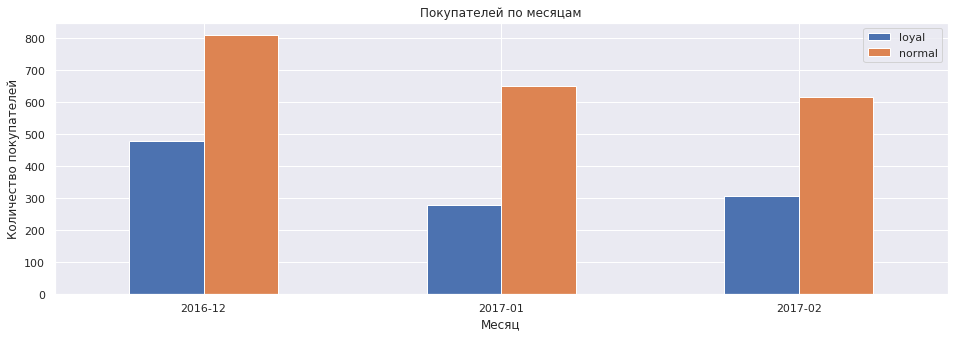

month,2016-12,2017-01,2017-02
loyal,478,280,306
normal,808,651,615


In [29]:
def mau_plt(df):
    df['month'] = df['buy_date'].dt.to_period('M')
    mau_one = df.query('loyal == True').groupby(['month'])['uid'].count().to_frame().rename(columns={'uid':'loyal'})
    mau_second = df.query('loyal == False').groupby(['month'])['uid'].count().to_frame().rename(columns={'uid':'normal'})
    mau = mau_one.merge(mau_second, on="month")
    
    mau.plot(kind="bar",figsize=(16,5))
    plt.title('Покупателей по месяцам')
    plt.xlabel('Месяц')
    plt.ylabel('Количество покупателей')
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    return mau.T
    
mau_plt(dwm)

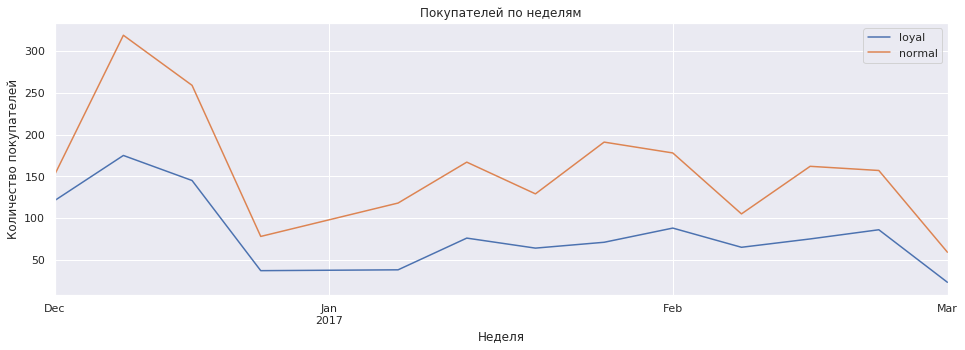

week,2016-11-28/2016-12-04,2016-12-05/2016-12-11,2016-12-12/2016-12-18,2016-12-19/2016-12-25,2017-01-02/2017-01-08,2017-01-09/2017-01-15,2017-01-16/2017-01-22,2017-01-23/2017-01-29,2017-01-30/2017-02-05,2017-02-06/2017-02-12,2017-02-13/2017-02-19,2017-02-20/2017-02-26,2017-02-27/2017-03-05
loyal,121,175,145,37,38,76,64,71,88,65,75,86,23
normal,152,319,259,78,118,167,129,191,178,105,162,157,59


In [30]:
def wau_plt(df):
    df['week'] = df['buy_date'].dt.to_period('W')
    mau_one = df.query('loyal == True').groupby(['week'])['uid'].count().to_frame().rename(columns={'uid':'loyal'})
    mau_second = df.query('loyal == False').groupby(['week'])['uid'].count().to_frame().rename(columns={'uid':'normal'})
    mau = mau_one.merge(mau_second, on="week")

    mau.plot(figsize=(16,5))
    plt.title('Покупателей по неделям')
    plt.xlabel('Неделя')
    plt.ylabel('Количество покупателей')
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    return mau.T
    
wau_plt(dwm)

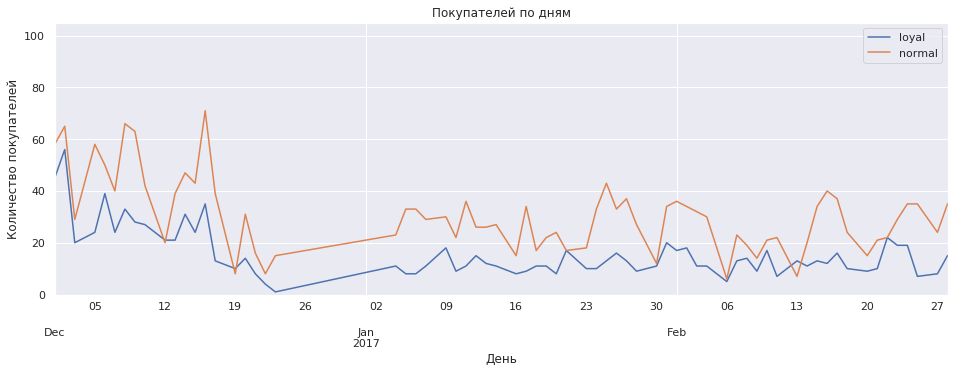

day,2016-12-01,2016-12-02,2016-12-03,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-18,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-27,2017-02-28
loyal,45,56,20,24,39,24,33,28,27,21,21,31,24,35,13,10,14,8,4,1,11,8,8,11,18,9,11,15,12,11,8,9,11,11,8,17,10,10,13,16,13,9,11,20,17,18,11,11,5,13,14,9,17,7,13,11,13,12,16,10,9,10,22,19,19,7,8,15
normal,58,65,29,58,50,40,66,63,42,20,39,47,43,71,39,8,31,16,8,15,23,33,33,29,30,22,36,26,26,27,15,34,17,22,24,17,18,33,43,33,37,27,12,34,36,34,32,30,6,23,19,14,21,22,7,20,34,40,37,24,15,21,22,29,35,35,24,35


In [31]:
def dau_plt(df):
    df['day'] = df['buy_date'].dt.to_period('D')
    mau_one = df.query('loyal == True').groupby(['day'])['uid'].count().to_frame().rename(columns={'uid':'loyal'})
    mau_second = df.query('loyal == False').groupby(['day'])['uid'].count().to_frame().rename(columns={'uid':'normal'})
    mau = mau_one.merge(mau_second, on="day")

    mau.plot(figsize=(16,5))
    plt.bar(100, 100, align="edge",width=1)
    plt.title('Покупателей по дням')
    plt.xlabel('День')
    plt.ylabel('Количество покупателей')
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    return mau.T
    
dau_plt(dwm)

<a id='step_42'></a>

### 4.2 В каких магазинах покупают больше?

In [46]:
shop_by_month = full_df.pivot_table(index = 'shopid', columns = 'buy_month', values = 'buy_id', aggfunc = 'nunique')
shop_by_month['total'] = shop_by_month[1] + shop_by_month[2] + shop_by_month[12]

In [49]:
def shop_plt(col_val,aggfunc,title,ytitle,xtitle):
    df = full_df.pivot_table(index='buy_month', columns='shopid',values=col_val,aggfunc=aggfunc).T
    df['total'] = df[1] + df[2] + df[12]
    return df
    df = df.fillna(0)
    df = df.sort_values(by='total',ascending=False)[[1,2,12]].head(5)
    df.T.plot(kind="bar",figsize=(16,5))
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show();
shop_plt('buy_id','nunique','Уникальных покупателей в месяц','Количество покупателей','Месяц')

buy_month,1,2,12,total
shopid,,,,
Shop 0,937.00,937.00,"1,376.00","3,250.00"
Shop 1,29.00,21.00,20.00,70.00
Shop 10,4.00,2.00,6.00,12.00
Shop 11,3.00,1.00,2.00,6.00
Shop 12,3.00,8.00,5.00,16.00
Shop 13,nan,nan,3.00,nan
Shop 14,nan,2.00,2.00,nan
Shop 15,1.00,nan,1.00,nan
Shop 16,1.00,nan,1.00,nan


In [50]:
shop_plt('price_total','sum','Выручка по топ-5 магазинам за месяц','Объем выручки','Месяц')

buy_month,1,2,12,total
shopid,,,,
Shop 0,"517,804.83","452,905.37","685,018.78","1,655,728.97"
Shop 1,"18,919.85","10,713.46","12,391.47","42,024.78"
Shop 10,"4,317.42","1,398.71","3,058.95","8,775.09"
Shop 11,"3,099.42",345.21,843.56,"4,288.19"
Shop 12,"1,238.71","2,717.67","2,302.14","6,258.52"
Shop 13,nan,nan,"1,797.65",nan
Shop 14,nan,"1,867.02","1,587.45",nan
Shop 15,765.60,nan,846.45,nan
Shop 16,674.15,nan,276.60,nan


<a id='step_43'></a>

### 4.3 Сколько в среднем покупают и какая в среднем прибыль с клиента за период?

In [35]:
revenue = final_df.groupby(['uid','loyal','buy_month'])['price_total'].sum().to_frame()
revenue_loyal = revenue.query('loyal == True')
revenue_normal = revenue.query('loyal == False')
buy_count = final_df.groupby(['loyal','uid']).agg({'buy_id': 'nunique'}).rename(columns={'buy_id': 'buy_count'})
buy_loyal = buy_count.query('loyal == True')
buy_normal = buy_count.query('loyal == False')

printmd('**Описание прибыли:**')
display_side_by_side([revenue.describe(),revenue_loyal.describe(),revenue_normal.describe()], ['total','loyal','normal'])
print()
printmd('**Описание количества покупок:**')
display_side_by_side([buy_count.describe(),buy_loyal.describe(),buy_normal.describe()], ['total','loyal','normal'])

**Описание прибыли:**

,price_total
count,2270
mean,620.279
std,739.754
min,1.148
25%,241.579
50%,428.286
75%,731.895
max,9910.07
,price_total
count,778


**Описание количества покупок:**

,buy_count
count,1613
mean,1.94916
std,2.36442
min,1
25%,1
50%,1
75%,2
max,44
,buy_count
count,546


In [36]:
printmd('**Средний чек:** %.2f' % (revenue['price_total'].describe()['mean']))
printmd('**Ср. чек лояльного клиента:** %.2f' % (revenue_loyal['price_total'].describe()['mean']))
printmd('**Ср. чек обычного клиента:** %.2f' % (revenue_normal['price_total'].describe()['mean']))
printmd('**Среднее кол-во покупок:** %.2f' % (buy_count['buy_count'].describe()['mean']))
printmd('**Ср. кол-во покупок лояльного клиента:** %.2f' % (buy_loyal['buy_count'].describe()['mean']))
printmd('**Среднее кол-во покупок обычного клиента:** %.2f' % (buy_normal['buy_count'].describe()['mean']))

**Средний чек:** 620.28

**Ср. чек лояльного клиента:** 568.16

**Ср. чек обычного клиента:** 647.46

**Среднее кол-во покупок:** 1.95

**Ср. кол-во покупок лояльного клиента:** 1.95

**Среднее кол-во покупок обычного клиента:** 1.95

<a id='step_44'></a>
### 4.4 Как часто покупатели возвращаются?

In [37]:
first_activity = final_df.groupby('uid')['buy_date'].min()
first_activity.name = 'first_activity_date'
first_activity = first_activity.to_frame()

def retention(df):
    # Добавил дату первой активности к датафрейму `df`, объединив их по колонке `uid`.
    df = df.join(first_activity, on='uid')

    # Поменял типы данных дат для оперирования месяцами.
    df['first_session_week'] = df['first_activity_date'].astype('datetime64[W]')
    df['session_week'] = df['buy_date'].astype('datetime64[W]')
    df['buy_week'] = df['buy_date'].astype('datetime64[W]')
    
    # Вычислил lifetime.
    df['cohort_lifetime'] = df['buy_week'] - df['first_session_week']
    df['cohort_lifetime'] = df['cohort_lifetime'] / np.timedelta64(1,'W')
    df['cohort_lifetime'] = df['cohort_lifetime'].round().astype('int')
    
    # Через lifetime сформировал когорты.
    cohorts = df.groupby(['first_session_week','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

    # Определил кол-во пользователей по когортам.
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_week','uid']]
    initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

    # По полю `first_session_month` объеденил датафреймы cohorts и initial_users_count.
    cohorts = cohorts.merge(initial_users_count,on='first_session_week')
    # Вычислил коэффициент удержания
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
    
    retention_pivot = cohorts.pivot_table(index='first_session_week',
                                          columns='cohort_lifetime',values='retention',aggfunc='sum')
    return retention_pivot

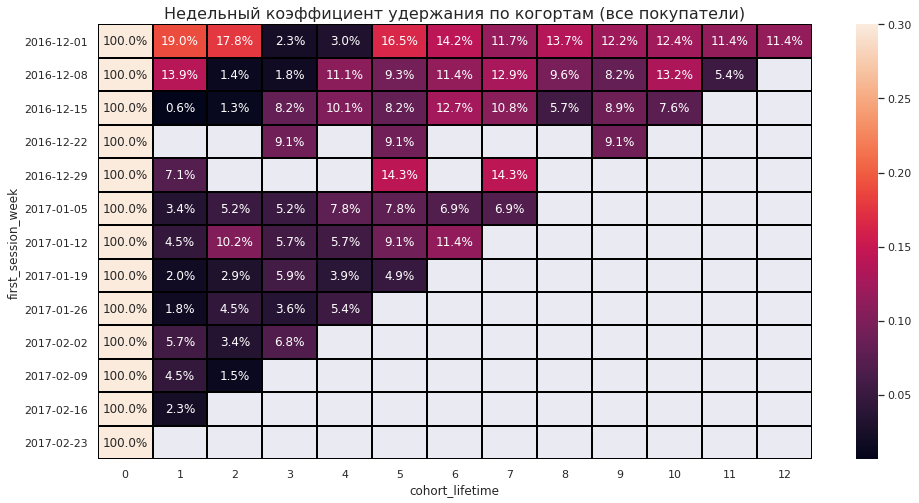

In [38]:
plt.figure(figsize=(16, 8))
plt.title('Недельный коэффициент удержания по когортам (все покупатели)',fontsize=16)
sns.set(style="white")
ret_pivot = retention(final_df)
sns.heatmap(ret_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black',\
            vmax=0.3, yticklabels=ret_pivot.index.strftime('%Y-%m-%d'));

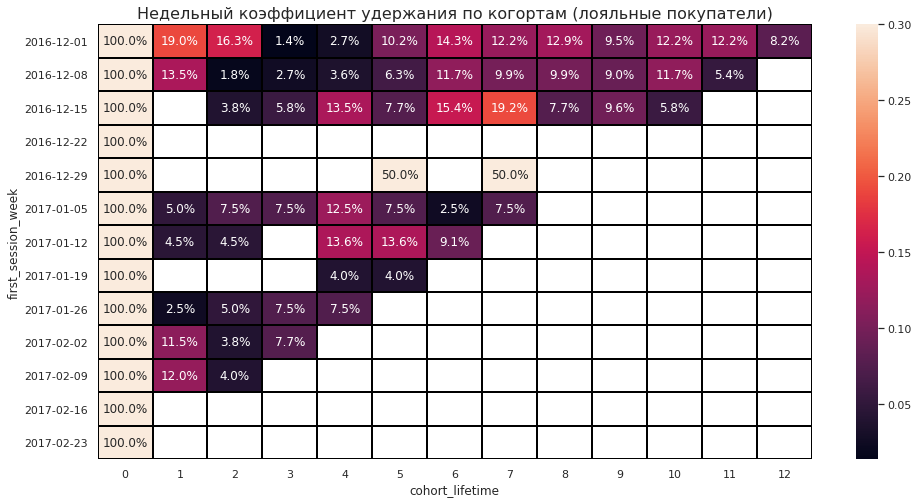

In [39]:
plt.figure(figsize=(16, 8))
plt.title('Недельный коэффициент удержания по когортам (лояльные покупатели)',fontsize=16)
sns.set(style="white")
ret_pivot = retention(final_df.query('loyal == True'))
sns.heatmap(ret_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black',\
            vmax=0.3, yticklabels=ret_pivot.index.strftime('%Y-%m-%d'));

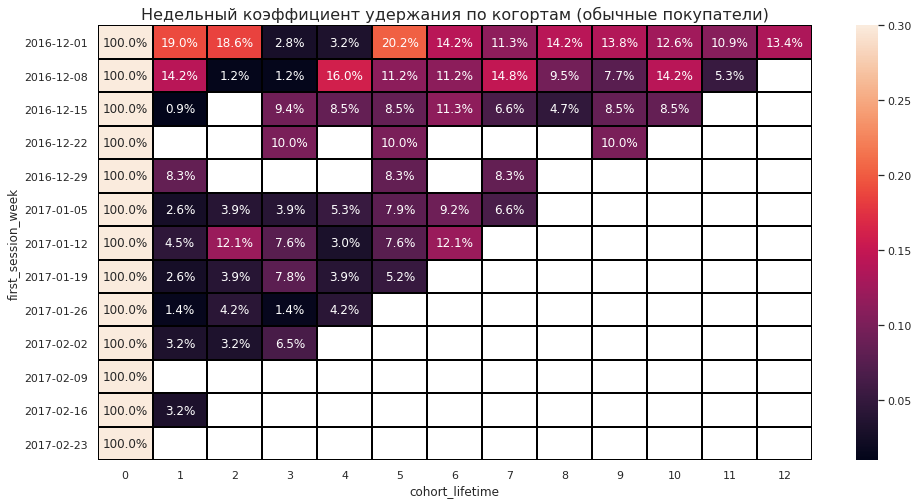

In [40]:
plt.figure(figsize=(16, 8))
plt.title('Недельный коэффициент удержания по когортам (обычные покупатели)',fontsize=16)
sns.set(style="white")
ret_pivot = retention(final_df.query('loyal == False'))
sns.heatmap(ret_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black',\
            vmax=0.3, yticklabels=ret_pivot.index.strftime('%Y-%m-%d'));

### Вывод

По статистике с 1 декабря 2016 года по 28 февраля 2017:
* Уникальных обычных покупателей в 2 раза больше, чем покупателей лояльной программы.
* Каждый покупатель покупает в среднем 2 раза в квартал.
* Средний чек покупки 620.
* Подавляющее большинство (90%) покупателей и прибыли у магазина Shop 0.  
* В целом Retention Rate низкий, это связано с тем, что строительные материалы покупают не часто. У новогодних когорт видны пропуски, клиенты почти не возвращались. Самая успешная когорта - первая "2016-12-1".

<a id='step_5'></a>
## 5. Формулирование, проверка и пояснения гипотез:

Применил гипотезу о равенстве средних двух генеральных совокупностей.

In [41]:
from scipy import stats as st

#fix_2.1
def hypothesis(df1,df2,col):
    print('Среднее 1-группы: {:.2f}'.format(df1[col].mean()))
    print('Среднее 2-группы: {:.2f}'.format(df2[col].mean()))
    print()

    print('Количество наблюдений ген. совокупности 1-группы: {}'.format(len(df1)))
    print('Количество наблюдений ген. совокупности 2-группы: {}'.format(len(df2)))
    print()

    print('Дисперсия выборки 1-группы: {:.2f}'.format(df1[col].var(ddof=0)))
    print('Дисперсия выборки 2-группы: {:.2f}'.format(df2[col].var(ddof=0)))
    print()

    #Пороговое значение alpha установил 5%
    alpha = .05
    #Дисперсии не равны, разница больше 5%, поэтому установил equal_var равным False.
    results = st.ttest_ind(df1[col], df2[col], equal_var = False)
    print('p-значение:', results.pvalue)
    
#fix_2.2
    printmd('**Вывод:**')
    if (results.pvalue > alpha):
        print("Отвергаем нулевую гипотезу. Средние генеральных совокупностей равны.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу. Средние генеральных совокупностей различаются.")

### Гипотеза о равенстве средних двух генеральных совокупностей прибыли между обычными покупателями и участниками лояльной программы.
<b>Нулевая гипотеза:</b> Cредняя выручка с покупателей лояльной программы равна средней выручке с обычных покупателей.<br>
<b>Альтернативную гипотезу:</b> Cредняя выручка с покупателей лояльной программы и средняя выручка с обычных покупателей отличается.

In [42]:
hypothesis(revenue_loyal,revenue_normal,'price_total')

Среднее 1-группы: 568.16
Среднее 2-группы: 647.46

Количество наблюдений ген. совокупности 1-группы: 778
Количество наблюдений ген. совокупности 2-группы: 1492

Дисперсия выборки 1-группы: 412556.42
Дисперсия выборки 2-группы: 614943.66

p-значение: 0.009909114040994075


**Вывод:**

Не получилось отвергнуть нулевую гипотезу. Средние генеральных совокупностей различаются.


### Гипотеза о равенстве средних двух генеральных совокупностей количества покупок между обычными покупателями и участниками лояльной программы.
<b>Нулевая:</b> Среднее количество покупок для участников лояльной программы равно среднему количеству покупок для обычных покупателей.<br>
<b>Альтернативная:</b>  Среднее количество покупок для участников лояльной программы отличается от среднего количества покупок для обычных покупателей.

In [43]:
hypothesis(buy_loyal,buy_normal,'buy_count')

Среднее 1-группы: 1.95
Среднее 2-группы: 1.95

Количество наблюдений ген. совокупности 1-группы: 546
Количество наблюдений ген. совокупности 2-группы: 1067

Дисперсия выборки 1-группы: 4.46
Дисперсия выборки 2-группы: 6.17

p-значение: 0.9858512395194856


**Вывод:**

Отвергаем нулевую гипотезу. Средние генеральных совокупностей равны.


<a id='step_6'></a>
## 6. Общий вывод:

На основе данных от с 1 декабря 2016 года до 28 февраля 2017 были проведены исследования. По итогу можно сделать выводы: 
* В среднем один обычный клиент приносит больше прибыли (~11%), чем лояльный (не учитывая подписку).
* Самый популярный и прибыльный магазин это shop 0.
* Разницы между количеством покупок лояльных и обычных клиентов нет.

Учитывая прибыль за подписку программы лояльности 200 рублей в месяц, то лояльный клиент приносит 768 рублей в месяц. Это на 15.5% больше, чем средняя прибыль в 648 рублей с обычного покупателя в месяц.